# Create a column of date time in a data frame

Pandas does a pretty good job recognizing dates, but sometimes you need to tell it what to look for. This table shows some the code you can use to parse dates in Pandas.

Lets take the date : 26-10-1985, that is October 26, 1985. 

ref | refers to | for 26-10-1985: returns
----|------------|-------
%d  |day of the month. | %d returns 26.
%m  |month of the year.| %m returns 10.
%Y |year (*note the uppercase Y*) | %Y returns 1985.
%y |year in two-digit format (*note the lowercase y*)| %y returns 85.

In [5]:
path = "../data/BunchOfDates.csv"
dat = pd.read_csv(path)
dat.head(10)

,date1,date2,date3,date4,date5,date6,date7
0,11/5/1955 6:00,5-Nov-55 06:00,Nov-55,11/5/1955,11/5/1955,"Saturday, November 5, 1955",11/5/1955
1,11/6/1955 6:00,6-Nov-55 06:00,Nov-55,11/6/1955,11/6/1955,"Sunday, November 6, 1955",11/6/1955
2,11/7/1955 6:00,7-Nov-55 06:00,Nov-55,11/7/1955,11/7/1955,"Monday, November 7, 1955",11/7/1955
3,11/8/1955 6:00,8-Nov-55 06:00,Nov-55,11/8/1955,11/8/1955,"Tuesday, November 8, 1955",11/8/1955
4,11/9/1955 6:00,9-Nov-55 06:00,Nov-55,11/9/1955,11/9/1955,"Wednesday, November 9, 1955",11/9/1955
5,11/10/1955 6:00,10-Nov-55 06:00,Nov-55,11/10/1955,11/10/1955,"Thursday, November 10, 1955",11/10/1955
6,11/11/1955 6:00,11-Nov-55 06:00,Nov-55,11/11/1955,11/11/1955,"Friday, November 11, 1955",11/11/1955
7,11/12/1955 6:00,12-Nov-55 06:00,Nov-55,11/12/1955,11/12/1955,"Saturday, November 12, 1955",11/12/1955


In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date1   8 non-null      object
 1   date2   8 non-null      object
 2   date3   8 non-null      object
 3   date4   8 non-null      object
 4   date5   8 non-null      object
 5   date6   8 non-null      object
 6   date7   8 non-null      object
dtypes: object(7)
memory usage: 576.0+ bytes


In [7]:
dat['date1'] = pd.to_datetime(dat['date1'])
dat['date1'] 

0   1955-11-05 06:00:00
1   1955-11-06 06:00:00
2   1955-11-07 06:00:00
3   1955-11-08 06:00:00
4   1955-11-09 06:00:00
5   1955-11-10 06:00:00
6   1955-11-11 06:00:00
7   1955-11-12 06:00:00
Name: date1, dtype: datetime64[ns]

In [ ]:
dat.info()

Let's imagine that date2 won't be read automagically (it will, we are pretending). To change that date string to a pandas date time we will tell pandas how it is organized.

In [ ]:
dat['date2']

In [ ]:
# https://docs.python.org/3/library/datetime.html


#oops
#dat['date2_fixed'] = pd.to_datetime(dat['date2'], format='%m/%d/%Y %H:%M')

#fix it
dat['date2_fixed'] = pd.to_datetime(dat['date2'], format='%d-%b-%y %H:%M')

In [ ]:
#first lets look at the date in that column.

dat['date2'] = pd.to_datetime(dat['date2'])

In [ ]:
dat.info()

## Working with date data

Let's move to a larger data set, with daily data. 

In [6]:
# load csv of "GSPC"(S&P) data
# if the dates need to be adjusted, they can be parsed in here or as a later step... we will use a 2 step process. 
import pandas as pd
import matplotlib.pyplot as plt

path = "C:/Users/JDavis/Dropbox/UFCOURSES/MAR4933/MAR4933Spring2021/content/notebooks/data/GSPC.csv"
sp = pd.read_csv(path)
sp['Date'] = pd.to_datetime(sp['Date'])
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-01,1970.089966,1970.089966,1903.069946,1913.849976,1913.849976,4371850000
1,2015-09-02,1916.520020,1948.910034,1916.520020,1948.859985,1948.859985,3742620000
2,2015-09-03,1950.790039,1975.010010,1944.719971,1951.130005,1951.130005,3520700000
3,2015-09-04,1947.760010,1947.760010,1911.209961,1921.219971,1921.219971,3167090000
4,2015-09-08,1927.300049,1970.420044,1927.300049,1969.410034,1969.410034,3548650000


In [ ]:
sp.describe()

In [ ]:
sp['Date'].dt.day_name()

In [ ]:
sp['Weekday'] = sp['Date'].dt.day_name()
sp.head(10)

In [ ]:
sp['Date'].max() - sp['Date'].min()

In [ ]:
# Index the date
sp.set_index('Date', inplace = True) 


In [ ]:
sp.info()
sp.head()

In [8]:
sp['Close'].resample(rule = 'W').mean().plot(kind = 'bar', figsize = (15,5))
plt.title('Weekly mean close price for S&P')

NameError: name 'sp' is not defined

In [9]:
sp['Close'].resample(rule = 'W').mean().plot(kind = 'line', figsize = (15,5))


NameError: name 'sp' is not defined

### Selecting dates

Our date time is NOT an index right now..


In [ ]:
path = "../data/GSPC.csv"
sp = pd.read_csv(path)


sp['Date'] = pd.to_datetime(sp['Date'])
sp.head()



In [ ]:
filter_sp = (sp['Date'] >= '2018')
sp.loc[filter_sp]

In [ ]:
filter_sp = (sp['Date'] >= '2018') & (sp['Date'] < '2019')
sp.loc[filter_sp]

In [ ]:
filter_sp = (sp['Date'] == '2018-12-27') 
sp.loc[filter_sp]

So that is selecting when Date is not an index... if you've indexed date the procedure is just as straightforward. Instead of using .loc, you can just use a slice on the index. 

In [ ]:
sp.set_index('Date', inplace = True) 

sp['2018-01':'2018-12']

Altertnative to going back and forth on the index


In [ ]:
path = "../data/GSPC.csv"
sp = pd.read_csv(path)
sp.head()
sp['Date'] = pd.to_datetime(sp['Date'])


In [ ]:
sp.set_index('Date', drop = False, inplace = True) 
sp

## Moving time

Indexed time series can be shifted along the index. For example, maybe we want to move the entire index by some small amount. This is easier to demonstrate with a small sample, so the below subset our data frame. 



In [40]:
#the DateTimeIndex has some nice properties, it is easier to subset for one!

example = sp.loc['2020-07-01':'2020-07-10', [ 'Open', 'Close']]
example.head(10)
raw = sp.loc['2020-07-01':'2020-07-10', [ 'Open', 'Close']]


In [45]:
from IPython.display import display_html
def sidetable(x1, x2):
    dfleft = x1.style.set_table_attributes("style='display:inline'").set_caption('Adjusted')
    dfright = x2.style.set_table_attributes("style='display:inline'").set_caption('Original')
    return display_html(dfleft._repr_html_() + dfright._repr_html_(), raw = True)

In [46]:
sidetable(example, raw)

,Open,Close
Date,,
2020-07-01 00:00:00,3105.919922,3115.860107
2020-07-02 00:00:00,3143.639893,3130.010010
2020-07-06 00:00:00,3155.290039,3179.719971
2020-07-07 00:00:00,3166.439941,3145.320068
2020-07-08 00:00:00,3153.070068,3169.939941
2020-07-09 00:00:00,3176.169922,3152.050049
2020-07-10 00:00:00,3152.469971,3185.040039
,Open,Close
Date,,


### Moving back in time


In [49]:
back = example.shift(-1)

In [50]:
sidetable(back, raw)

,Open,Close
Date,,
2020-07-01 00:00:00,3143.639893,3130.010010
2020-07-02 00:00:00,3155.290039,3179.719971
2020-07-06 00:00:00,3166.439941,3145.320068
2020-07-07 00:00:00,3153.070068,3169.939941
2020-07-08 00:00:00,3176.169922,3152.050049
2020-07-09 00:00:00,3152.469971,3185.040039
2020-07-10 00:00:00,nan,nan
,Open,Close
Date,,


### Moving forward in time

In [51]:
fwd = example.shift(1)
sidetable(fwd,raw)

,Open,Close
Date,,
2020-07-01 00:00:00,nan,nan
2020-07-02 00:00:00,3105.919922,3115.860107
2020-07-06 00:00:00,3143.639893,3130.010010
2020-07-07 00:00:00,3155.290039,3179.719971
2020-07-08 00:00:00,3166.439941,3145.320068
2020-07-09 00:00:00,3153.070068,3169.939941
2020-07-10 00:00:00,3176.169922,3152.050049
,Open,Close
Date,,


### Rolling time periods

In [52]:
# Back to the full data set

sp['Close'].head(35)

Date
2015-09-01    1913.849976
2015-09-02    1948.859985
2015-09-03    1951.130005
2015-09-04    1921.219971
2015-09-08    1969.410034
2015-09-09    1942.040039
2015-09-10    1952.290039
2015-09-11    1961.050049
2015-09-14    1953.030029
2015-09-15    1978.089966
2015-09-16    1995.310059
2015-09-17    1990.199951
2015-09-18    1958.030029
2015-09-21    1966.969971
2015-09-22    1942.739990
2015-09-23    1938.760010
2015-09-24    1932.239990
2015-09-25    1931.339966
2015-09-28    1881.770020
2015-09-29    1884.089966
2015-09-30    1920.030029
2015-10-01    1923.819946
2015-10-02    1951.359985
2015-10-05    1987.050049
2015-10-06    1979.920044
2015-10-07    1995.829956
2015-10-08    2013.430054
2015-10-09    2014.890015
2015-10-12    2017.459961
2015-10-13    2003.689941
2015-10-14    1994.239990
2015-10-15    2023.859985
2015-10-16    2033.109985
2015-10-19    2033.660034
2015-10-20    2030.770020
Name: Close, dtype: float64

In [54]:
rolled = sp.rolling(window=5).mean()['Close']
rolled.head(35)

Date
2015-09-01            NaN
2015-09-02            NaN
2015-09-03            NaN
2015-09-04            NaN
2015-09-08    1940.893994
2015-09-09    1946.532007
2015-09-10    1947.218018
2015-09-11    1949.202026
2015-09-14    1955.564038
2015-09-15    1957.300024
2015-09-16    1967.954028
2015-09-17    1975.536011
2015-09-18    1974.932007
2015-09-21    1977.719995
2015-09-22    1970.650000
2015-09-23    1959.339990
2015-09-24    1947.747998
2015-09-25    1942.409985
2015-09-28    1925.369995
2015-09-29    1913.639990
2015-09-30    1909.893994
2015-10-01    1908.209985
2015-10-02    1912.213989
2015-10-05    1933.269995
2015-10-06    1952.436011
2015-10-07    1967.595996
2015-10-08    1985.518018
2015-10-09    1998.224024
2015-10-12    2004.306006
2015-10-13    2009.059985
2015-10-14    2008.741992
2015-10-15    2010.827978
2015-10-16    2014.471972
2015-10-19    2017.711987
2015-10-20    2023.128003
Name: Close, dtype: float64

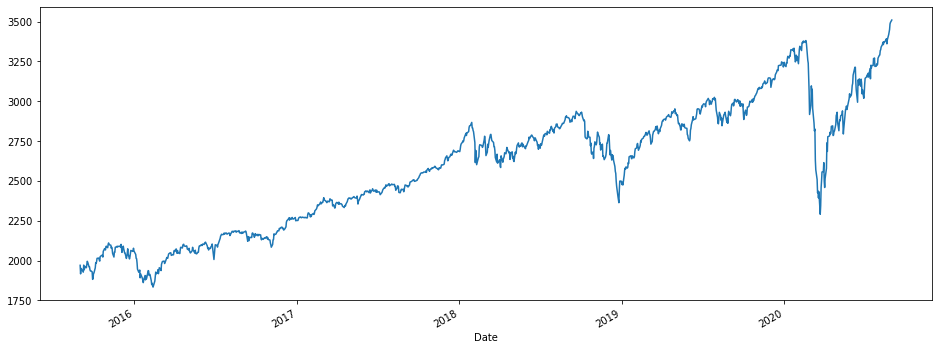

In [59]:
sp.rolling(window=1).mean()['Open'].plot(figsize=(16, 6))